In [2]:
% camera processing pipeline (color correction experimentation)
load("./seed-image-rendering.mat");
who

Variables visible from the current scope:

JPG                 ans                 outputbrightness
RAW                 colourcorrection    whitepoint
__vsc_ipynb_file__  inputbrightness



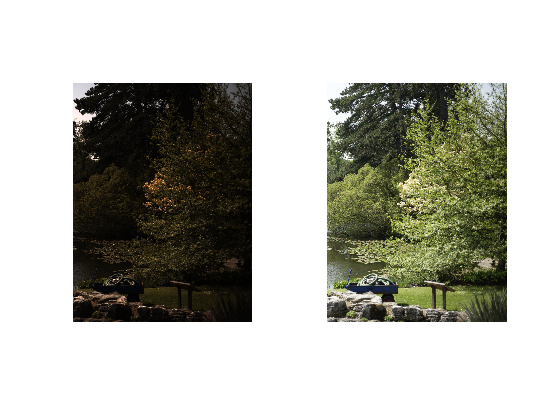

In [3]:
% show the RAW and processed JPG image

figure;
subplot(1,2,1);
imshow(RAW);

subplot(1,2,2);
imshow(JPG);

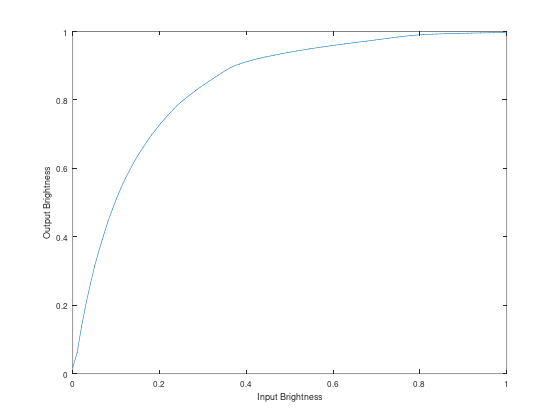

In [4]:
% Plot graph of input brightness against output brightness

figure;
plot(inputbrightness, outputbrightness);
xlabel("Input Brightness");
ylabel("Output Brightness");

In [5]:
% reshape the RAW image into numel(RAW)x3 column vectors 

[raw_row, raw_col, raw_depth]       = size(RAW);
reshaped_raw                        = reshape(RAW, [raw_row*raw_col, raw_depth]);

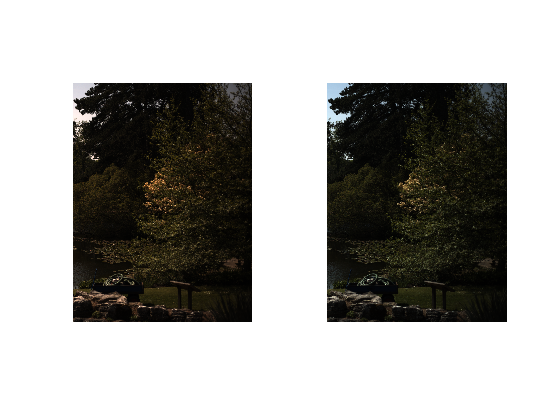

In [6]:
% create a whitepoint matrix and use it to generate a whitepoint corrected RAW image

whitepoint_matrix               = diag(1./whitepoint);
raw_whitepoint_corrected        = reshape(reshaped_raw*whitepoint_matrix, [raw_row, raw_col, raw_depth]);


figure;
subplot(1,2,1);
imshow(RAW);

subplot(1,2,2);
imshow(raw_whitepoint_corrected);

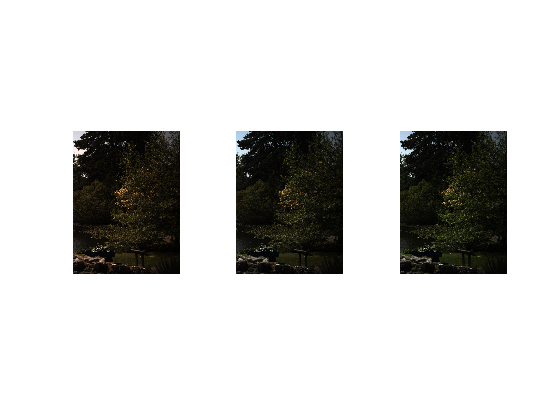

In [7]:
% apply the colourcorrection matrix to the whitepoint corrected image

raw_whitepoint_x_colour_corrected        = reshape((reshaped_raw*whitepoint_matrix)*colourcorrection, [raw_row, raw_col, raw_depth]);

figure;
subplot(1,3,1);
imshow(RAW);

subplot(1,3,2);
imshow(raw_whitepoint_corrected);

subplot(1,3,3);
imshow(raw_whitepoint_x_colour_corrected);

    imshow at line 206 column 7



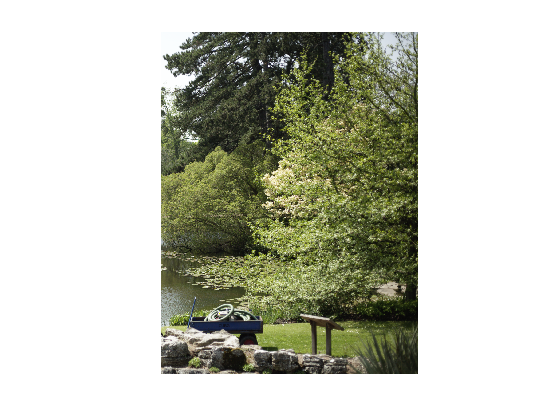

In [8]:

% apply interpolation to get the final image

JPGnew = interp1(inputbrightness, outputbrightness, raw_whitepoint_x_colour_corrected, 'pchip');

imshow(JPGnew);